# <b>Reuter data set news classification(multi-class classfication)</b>

## Load data

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


## Decoding to words

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Preprocessing
- conver data to one-hot encoding

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

- convert label data to one-hot encoding(manually)

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels) # train label convert
one_hot_test_labels = to_one_hot(test_labels) # test label convert


- convert label data to one-hot encoding(using keras module)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Model definition
- 64 hidden units
- 2 hidden layers

In [ ]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## Model compile

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

## Test using validation set

In [ ]:
# preparing validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_test_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# training model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 1s 62ms/step - loss: 0.2545 - acc: 0.9417 - val_loss: 5.8315 - val_acc: 0.1930
Epoch 2/20
16/16 [==============================] - 1s 52ms/step - loss: 0.2174 - acc: 0.9476 - val_loss: 5.9083 - val_acc: 0.2110
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 0.1909 - acc: 0.9513 - val_loss: 6.1628 - val_acc: 0.2000
Epoch 4/20
16/16 [==============================] - 1s 58ms/step - loss: 0.1709 - acc: 0.9540 - val_loss: 6.2452 - val_acc: 0.2060
Epoch 5/20
16/16 [==============================] - 1s 58ms/step - loss: 0.1551 - acc: 0.9534 - val_loss: 6.6067 - val_acc: 0.2050
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.1411 - acc: 0.9564 - val_loss: 6.5162 - val_acc: 0.2090
Epoch 7/20
16/16 [==============================] - 1s 58ms/step - loss: 0.1342 - acc: 0.9549 - val_loss: 6.8562 - val_acc: 0.1970
Epoch 8/20
16/16 [==============================] - 1s 51ms/step - loss: 0.1270 - a

## Drawing graph
- loss graph

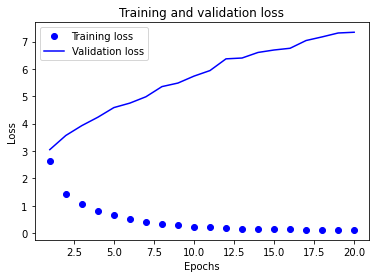

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- Acc graph

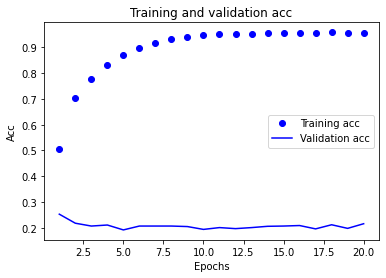

In [ ]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()


## epoch 줄여서 재학습(overfitting 방지)
- 0.78에서 0.79로 acc 조금 상승
- 보통 그래프를 보고 과적합이 일어나는 지점의 epoch을 파악해 해당 시점까지 학습을 진행시킨다.


In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 61ms/step - loss: 2.7004 - acc: 0.5113 - val_loss: 3.0751 - val_acc: 0.2530
Epoch 2/9
16/16 [==============================] - 1s 58ms/step - loss: 1.4746 - acc: 0.6948 - val_loss: 3.5921 - val_acc: 0.2180
Epoch 3/9
16/16 [==============================] - 1s 55ms/step - loss: 1.0946 - acc: 0.7618 - val_loss: 4.0009 - val_acc: 0.2030
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.8670 - acc: 0.8138 - val_loss: 4.2372 - val_acc: 0.1940
Epoch 5/9
16/16 [==============================] - 1s 49ms/step - loss: 0.6949 - acc: 0.8601 - val_loss: 4.5118 - val_acc: 0.2090
Epoch 6/9
16/16 [==============================] - 1s 61ms/step - loss: 0.5570 - acc: 0.8887 - val_loss: 4.7321 - val_acc: 0.2030
Epoch 7/9
16/16 [==============================] - 1s 51ms/step - loss: 0.4517 - acc: 0.9058 - val_loss: 4.9690 - val_acc: 0.2010
Epoch 8/9
16/16 [==============================] - 1s 59ms/step - loss: 0.3697 - acc: 0.92

## Predict for new data

In [ ]:
predictions = model.predict(x_test) # predictions는 각 항목의 길이가 46인 벡터(46개의 topic 중 각각에 속할 확률)

In [ ]:
print(predictions[0])

[3.92810790e-07 1.48981453e-05 5.76418380e-09 7.78881907e-01
 2.04340681e-01 5.23084331e-08 8.23579593e-10 2.48658353e-06
 9.84617695e-03 1.26366535e-06 6.27499503e-06 2.70776975e-04
 3.84834209e-07 3.35392178e-05 3.49588447e-07 1.36173711e-07
 1.74236367e-04 9.71661294e-08 1.98050634e-06 1.24785153e-03
 5.07000927e-03 2.44631156e-05 1.04571626e-07 2.49732761e-06
 1.88263467e-08 2.80901827e-06 1.53210441e-12 6.84802437e-09
 8.50331503e-08 6.66549681e-07 2.94716131e-07 4.25771773e-08
 7.88004684e-08 1.06348219e-09 9.08346101e-06 8.19470756e-07
 6.50522634e-05 9.46228127e-08 3.41986741e-08 3.32235706e-09
 5.98361751e-08 2.58617405e-07 5.04942577e-09 4.38588970e-08
 5.13413700e-10 2.42086551e-09]


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

## 충분히 큰 중간층을 두어야 하는 이유

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 56ms/step - loss: 3.6473 - acc: 0.0272 - val_loss: 3.9949 - val_acc: 0.0180
Epoch 2/9
16/16 [==============================] - 1s 56ms/step - loss: 3.2668 - acc: 0.0851 - val_loss: 4.1012 - val_acc: 0.0180
Epoch 3/9
16/16 [==============================] - 1s 53ms/step - loss: 2.9623 - acc: 0.1485 - val_loss: 4.1959 - val_acc: 0.0190
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 2.6659 - acc: 0.1872 - val_loss: 4.2989 - val_acc: 0.0180
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 2.3542 - acc: 0.2233 - val_loss: 4.3928 - val_acc: 0.0740
Epoch 6/9
16/16 [==============================] - 1s 46ms/step - loss: 2.0186 - acc: 0.6066 - val_loss: 4.6479 - val_acc: 0.1710
Epoch 7/9
16/16 [==============================] - 1s 48ms/step - loss: 1.6781 - acc: 0.7167 - val_loss: 4.7945 - val_acc: 0.1830
Epoch 8/9
16/16 [==============================] - 1s 46ms/step - loss: 1.3927 - acc: 0.74